<a href="https://colab.research.google.com/github/afif-af/machine_learning_project/blob/main/ProjectBreastCancerPredictionusingPyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [74]:
# from google.colab import files
# uploaded=files.upload()

In [75]:
df=pd.read_csv('BRCA Data.csv')
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [76]:
df.isnull().sum()

,0
Patient_ID,7
Age,7
Gender,7
Protein1,7
Protein2,7
Protein3,7
Protein4,7
Tumour_Stage,7
Histology,7
ER status,7


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [78]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [79]:
df.isnull()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
337,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
338,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
339,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [80]:
df.shape

(341, 16)

In [81]:
df.dropna(inplace=True)

In [82]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [83]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
ER status,0


In [84]:
df.shape

(317, 16)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float64(5)

In [86]:
df.Gender.value_counts() #highly imbalanced data

,count
Gender,
FEMALE,313
MALE,4


In [87]:
print('Patient status is 100%')
round(df.Patient_Status.value_counts()*100/len(df),1)

Patient status is 100%


,count
Patient_Status,
Alive,80.4
Dead,19.6


Visulization

In [88]:
Patient_Status=df['Patient_Status'].value_counts()
transactions=Patient_Status.index
quantity=Patient_Status.values

figure=px.pie(df,
              values=quantity,
              names=transactions, hole=.60,
              title='Patient Status')
figure.show()

In [89]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [90]:
stage=df['Tumour_Stage'].value_counts()
transactions=stage.index
quantity=stage.values

figure=px.pie(df,
              values=quantity,
              names=transactions, hole=.60,
              title='Tumour state of patient')
figure.show()

In [91]:
stage=df['Histology'].value_counts()
transactions=stage.index
quantity=stage.values

figure=px.pie(df,
              values=quantity,
              names=transactions, hole=.60,
              title='Histology of patient')
figure.show()

In [92]:
ER_status=df['ER status'].value_counts()
transactions=ER_status.index
quantity=ER_status.values

figure=px.pie(df,
              values=quantity,
              names=transactions, hole=.60,
              title='ER status')
figure.show()

In [93]:
PR_status=df['PR status'].value_counts()
transactions=PR_status.index
quantity=ER_status.values

figure=px.pie(df,
              values=quantity,
              names=transactions, hole=.60,
              title='PR status')
figure.show()

In [94]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [95]:
HER2_status=df['HER2 status'].value_counts()
transactions=HER2_status.index
quantity=HER2_status.values

figure=px.pie(df,
              values=quantity,
              names=transactions, hole=.60,
              title='HER2 status')
figure.show()

In [96]:
df.drop(['Patient_ID','ER status','PR status','Date_of_Surgery','Date_of_Last_Visit'],axis=1,inplace=True)

In [97]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead


In [98]:
df.Gender.value_counts()

,count
Gender,
FEMALE,313
MALE,4


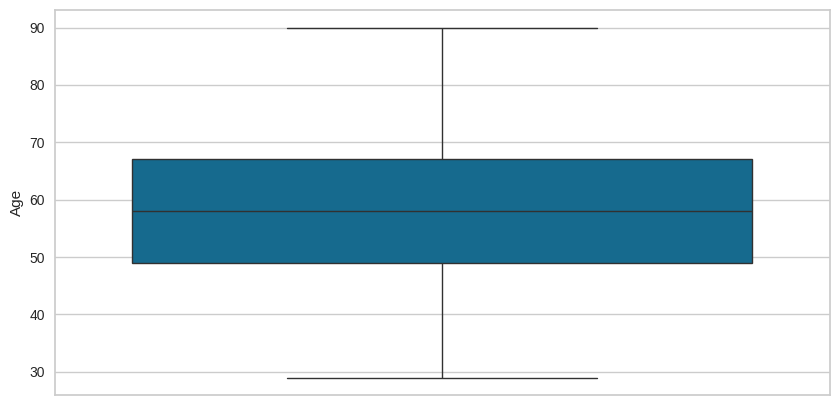

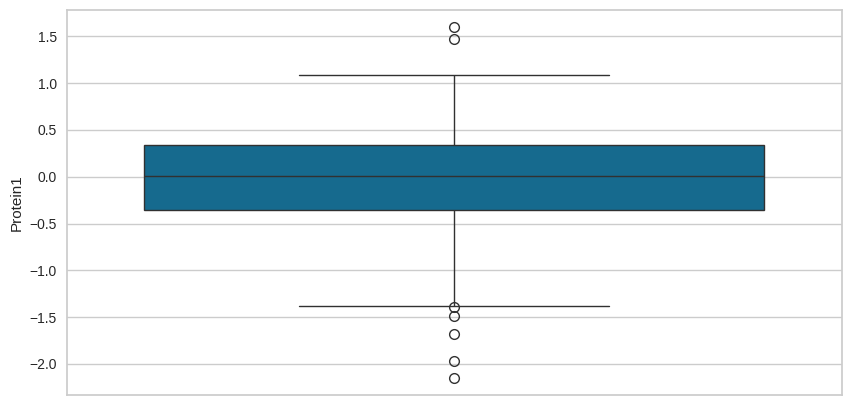

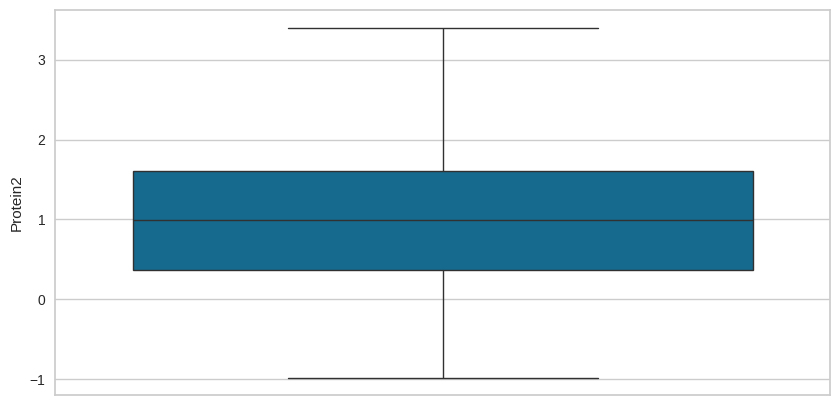

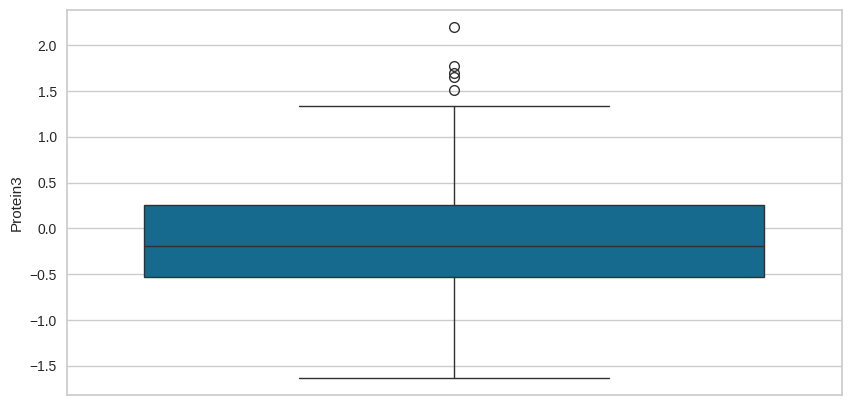

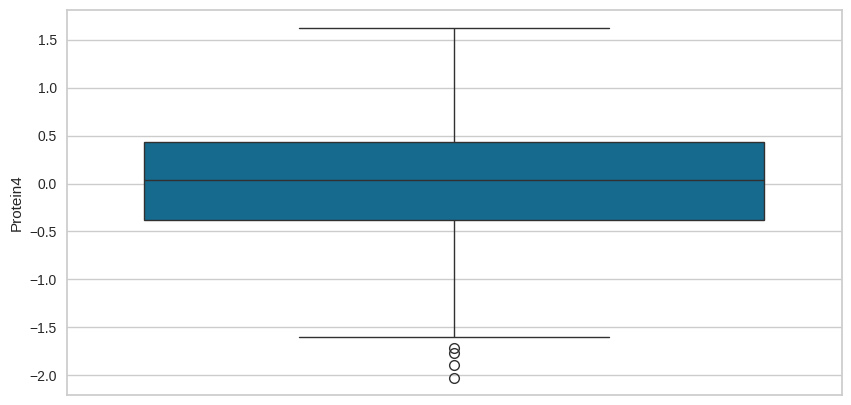

In [99]:
for i in ['Age','Protein1','Protein2','Protein3','Protein4']:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[i])
  plt.show()

In [100]:
# import pandas_profiling
# from pandas_profiling import ProfileReport
# ProfileReport(df, title="EDA Report of Breast Cancer Dataset")

In [101]:
from pycaret.classification import setup
from pycaret.classification import *

In [102]:
import mlflow

In [103]:
cancer=setup(data=df,
    target='Patient_Status',
    normalize=True,
    log_experiment=False,  # Disable experiment logging to avoid mlflow issue
    remove_multicollinearity=True,
    numeric_imputation='median',
    fold=5,
    train_size=0.70
             )

,Description,Value
0,Session id,5456
1,Target,Patient_Status
2,Target type,Binary
3,Target mapping,"Alive: 0, Dead: 1"
4,Original data shape,"(317, 11)"
5,Transformed data shape,"(317, 18)"
6,Transformed train set shape,"(221, 18)"
7,Transformed test set shape,"(96, 18)"
8,Numeric features,5
9,Categorical features,5


In [104]:
rf=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.5309,0.8000,0.6400,0.7111,0.0000,0.0000
1,0.8182,0.5035,0.8182,0.6694,0.7364,0.0000,0.0000
2,0.8182,0.4479,0.8182,0.6694,0.7364,0.0000,0.0000
3,0.7955,0.4952,0.7955,0.6327,0.7048,0.0000,0.0000
4,0.7955,0.6365,0.7955,0.6327,0.7048,0.0000,0.0000
Mean,0.8055,0.5228,0.8055,0.6489,0.7187,0.0000,0.0000
Std,0.0105,0.0628,0.0105,0.0170,0.0146,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [105]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [106]:
get_config('X_test')

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type
80,85.0,FEMALE,0.40384,0.48825,0.84111,0.61645,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
239,48.0,FEMALE,-0.34001,0.16257,-0.17720,0.41255,II,Mucinous Carcinoma,Negative,Simple Mastectomy
142,42.0,FEMALE,0.22611,1.74910,-0.54397,-0.39021,II,Infiltrating Ductal Carcinoma,Positive,Lumpectomy
54,85.0,FEMALE,0.74520,1.75730,-1.00620,-0.06174,II,Infiltrating Ductal Carcinoma,Positive,Modified Radical Mastectomy
306,64.0,FEMALE,-0.24408,1.69070,-0.12854,-1.34020,II,Infiltrating Lobular Carcinoma,Negative,Modified Radical Mastectomy
...,...,...,...,...,...,...,...,...,...,...
217,43.0,FEMALE,0.44281,1.41440,-0.93252,0.12166,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
168,70.0,FEMALE,0.70029,0.97347,-0.29645,0.10551,I,Infiltrating Ductal Carcinoma,Negative,Simple Mastectomy
200,42.0,FEMALE,0.17295,1.29660,-0.85677,-0.23695,II,Infiltrating Lobular Carcinoma,Negative,Modified Radical Mastectomy
241,49.0,FEMALE,-0.58397,-0.33272,-0.13087,-1.23910,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy


In [107]:
get_config('X_test_transformed')

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage_I,Tumour_Stage_II,Tumour_Stage_III,Histology_Infiltrating Lobular Carcinoma,Histology_Infiltrating Ductal Carcinoma,Histology_Mucinous Carcinoma,HER2 status,Surgery_type_Simple Mastectomy,Surgery_type_Modified Radical Mastectomy,Surgery_type_Lumpectomy,Surgery_type_Other
80,2.088645,-0.095564,0.918566,-0.479253,1.592120,0.962861,-0.470100,-1.173177,1.780396,-0.540738,0.589543,-0.180860,-0.288675,-0.519726,1.676408,-0.498586,-0.695141
239,-0.928820,-0.095564,-0.541595,-0.842462,-0.150187,0.643382,-0.470100,0.852386,-0.561673,-0.540738,-1.696229,5.529144,-0.288675,1.924091,-0.596513,-0.498586,-0.695141
142,-1.418139,-0.095564,0.569686,0.926889,-0.777722,-0.614418,-0.470100,0.852386,-0.561673,-0.540738,0.589543,-0.180860,3.464102,-0.519726,-0.596513,2.005674,-0.695141
54,2.088645,-0.095564,1.588648,0.936034,-1.568587,-0.099757,-0.470100,0.852386,-0.561673,-0.540738,0.589543,-0.180860,3.464102,-0.519726,1.676408,-0.498586,-0.695141
306,0.376030,-0.095564,-0.353287,0.861759,-0.066930,-2.102904,-0.470100,0.852386,-0.561673,1.849324,-1.696229,-0.180860,-0.288675,-0.519726,1.676408,-0.498586,-0.695141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,-1.336585,-0.095564,0.995063,0.553620,-1.442522,0.187602,-0.470100,0.852386,-0.561673,-0.540738,0.589543,-0.180860,-0.288675,-0.519726,1.676408,-0.498586,-0.695141
168,0.865349,-0.095564,1.500491,0.061881,-0.354221,0.162298,2.127205,-1.173177,-0.561673,-0.540738,0.589543,-0.180860,-0.288675,1.924091,-0.596513,-0.498586,-0.695141
200,-1.418139,-0.095564,0.465334,0.422246,-1.312916,-0.374283,-0.470100,0.852386,-0.561673,1.849324,-1.696229,-0.180860,-0.288675,-0.519726,1.676408,-0.498586,-0.695141
241,-0.847267,-0.095564,-1.020483,-1.394825,-0.070917,-1.944496,-0.470100,-1.173177,1.780396,-0.540738,0.589543,-0.180860,-0.288675,-0.519726,1.676408,-0.498586,-0.695141


In [108]:
get_config('target_param')

'Patient_Status'

In [109]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8146,0.6119,0.8146,0.7847,0.7822,0.2430,0.2755,0.4720
ridge,Ridge Classifier,0.8055,0.5470,0.8055,0.6489,0.7187,0.0000,0.0000,0.1320
rf,Random Forest Classifier,0.8055,0.5228,0.8055,0.6489,0.7187,0.0000,0.0000,0.3200
dummy,Dummy Classifier,0.8055,0.5000,0.8055,0.6489,0.7187,0.0000,0.0000,0.1220
lr,Logistic Regression,0.8010,0.5595,0.8010,0.6481,0.7165,-0.0083,-0.0151,0.1400
lda,Linear Discriminant Analysis,0.8010,0.5470,0.8010,0.6481,0.7165,-0.0083,-0.0151,0.1580
lightgbm,Light Gradient Boosting Machine,0.7826,0.5951,0.7826,0.7568,0.7573,0.1753,0.1971,0.6360
gbc,Gradient Boosting Classifier,0.7737,0.6246,0.7737,0.6940,0.7213,0.0176,0.0198,0.2520
knn,K Neighbors Classifier,0.7736,0.6056,0.7736,0.7221,0.7422,0.1207,0.1206,0.1480
svm,SVM - Linear Kernel,0.7467,0.5330,0.7467,0.7054,0.7214,0.0766,0.0799,0.1380


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=5456, verbose=0,
                     warm_start=False)

In [110]:
catb=create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.6667,0.8000,0.6400,0.7111,0.0000,0.0000
1,0.8182,0.5000,0.8182,0.6694,0.7364,0.0000,0.0000
2,0.8182,0.5174,0.8182,0.6694,0.7364,0.0000,0.0000
3,0.7955,0.3873,0.7955,0.6327,0.7048,0.0000,0.0000
4,0.7955,0.6635,0.7955,0.6327,0.7048,0.0000,0.0000
Mean,0.8055,0.5470,0.8055,0.6489,0.7187,0.0000,0.0000
Std,0.0105,0.1063,0.0105,0.0170,0.0146,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [111]:
evaluate_model(catb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [112]:
unseen_predictions=predict_model(rf, data=df)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9338,0.9187,0.9338,0.9351,0.9296,0.7651,0.7793


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,0.59
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead,Dead,0.85
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive,Alive,0.89
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,0.96
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead,Dead,0.85


In [113]:
save_model(rf, 'rf_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Protein1', 'Protein2',
                                              'Protein3', 'Protein4'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featur...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max

In [114]:
from pickle import load
from pycaret.classification import load_model
load_model('rf_model')

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'Protein1', 'Protein2',
                                             'Protein3', 'Protein4'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_e...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=5456, verbose=0,
                                        warm_start=False))],
         verbose=False)

In [115]:
# from IPython.display import Image
# Image(filename='rf_model.png')


In [116]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
x_resampled,y_resampled=ros.fit_resample(df.drop('Patient_Status',axis=1),df['Patient_Status'])

In [117]:
x_resampled.shape,y_resampled.shape

((510, 10), (510,))

In [118]:
x_resampled.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other


In [119]:
df2=pd.concat([x_resampled,y_resampled],axis=1)

In [120]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead


In [121]:
cancer=setup(data=df2,
    target='Patient_Status',
    normalize=True,
    log_experiment=False,  # Disable experiment logging to avoid mlflow issue
    remove_multicollinearity=True,
    numeric_imputation='median',
    fold=5,
    train_size=0.70
             )

,Description,Value
0,Session id,3834
1,Target,Patient_Status
2,Target type,Binary
3,Target mapping,"Alive: 0, Dead: 1"
4,Original data shape,"(510, 11)"
5,Transformed data shape,"(510, 18)"
6,Transformed train set shape,"(357, 18)"
7,Transformed test set shape,"(153, 18)"
8,Numeric features,5
9,Categorical features,5


In [122]:
rf2=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9306,0.9842,0.9306,0.9336,0.9304,0.8611,0.8641
1,0.8472,0.9479,0.8472,0.8497,0.8470,0.6944,0.6969
2,0.8732,0.9444,0.8732,0.8806,0.8725,0.7459,0.7535
3,0.9014,0.9238,0.9014,0.9017,0.9014,0.8027,0.8030
4,0.9577,0.9841,0.9577,0.9581,0.9577,0.9155,0.9159
Mean,0.9020,0.9569,0.9020,0.9047,0.9018,0.8039,0.8067
Std,0.0394,0.0237,0.0394,0.0382,0.0395,0.0788,0.0776


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [123]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9216,0.9575,0.9216,0.9223,0.9216,0.8433,0.8439,0.2960
rf,Random Forest Classifier,0.9020,0.9569,0.9020,0.9047,0.9018,0.8039,0.8067,0.3500
lightgbm,Light Gradient Boosting Machine,0.8541,0.9252,0.8541,0.8621,0.8531,0.7079,0.7160,0.5600
xgboost,Extreme Gradient Boosting,0.8515,0.9442,0.8515,0.8589,0.8505,0.7028,0.7102,0.2380
gbc,Gradient Boosting Classifier,0.8486,0.9306,0.8486,0.8594,0.8474,0.6971,0.7078,0.4540
dt,Decision Tree Classifier,0.8178,0.8175,0.8178,0.8383,0.8151,0.6353,0.6556,0.2380
ada,Ada Boost Classifier,0.7505,0.7952,0.7505,0.7613,0.7486,0.5011,0.5116,0.2320
knn,K Neighbors Classifier,0.6556,0.7161,0.6556,0.6666,0.6501,0.3112,0.3216,0.1460
lr,Logistic Regression,0.6275,0.6276,0.6275,0.6328,0.6235,0.2548,0.2600,0.1320
ridge,Ridge Classifier,0.6248,0.6258,0.6248,0.6310,0.6196,0.2492,0.2554,0.1420


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=3834, verbose=0,
                     warm_start=False)

In [124]:
et=create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9583,0.9734,0.9583,0.9587,0.9583,0.9167,0.9170
1,0.8611,0.9240,0.8611,0.8622,0.8610,0.7222,0.7233
2,0.9296,0.9488,0.9296,0.9299,0.9295,0.8591,0.8594
3,0.8873,0.9575,0.8873,0.8886,0.8873,0.7748,0.7760
4,0.9718,0.9837,0.9718,0.9718,0.9718,0.9437,0.9437
Mean,0.9216,0.9575,0.9216,0.9223,0.9216,0.8433,0.8439
Std,0.0419,0.0207,0.0419,0.0414,0.0419,0.0837,0.0833


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [125]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

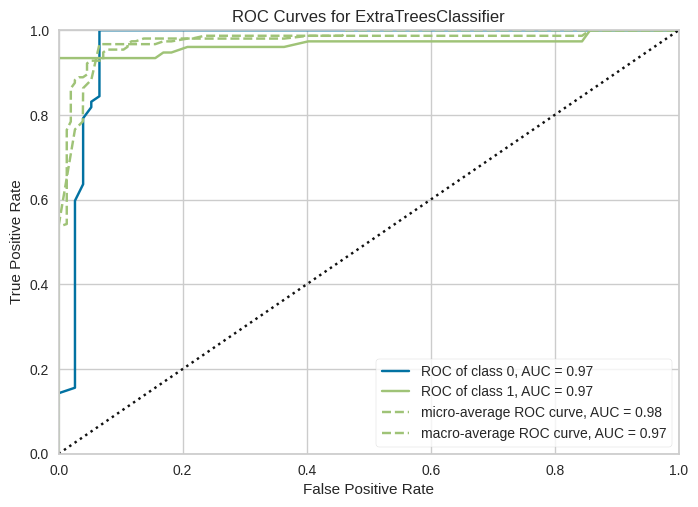

In [126]:
plot_model(et, plot='auc')

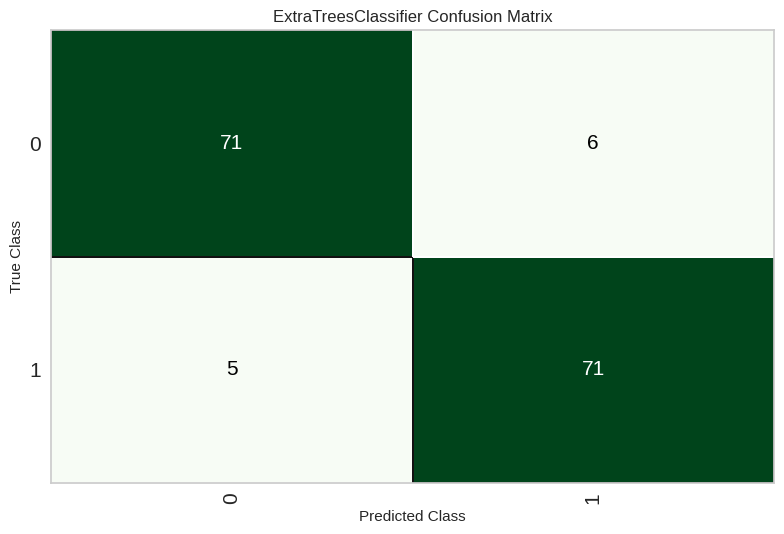

In [127]:
plot_model(et, plot='confusion_matrix')

In [128]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead


In [129]:
save_model(et, 'et_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Protein1', 'Protein2',
                                              'Protein3', 'Protein4'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featur...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_feat

In [130]:
load_model('et_model')

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'Protein1', 'Protein2',
                                             'Protein3', 'Protein4'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_e...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=3834, verbose=0,
                                      warm_start=False))],
         verbose=False)

In [131]:
unseen_predictions=predict_model(et, data=df)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9685,0.9923,0.9685,0.9689,0.9686,0.9010,0.9011


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,1.0
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead,Dead,1.0
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive,Alive,1.0
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,1.0
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead,Dead,1.0
